# Importaciones necesarias

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta
import fastf1 as ff1
import fastf1.plotting
from fastf1.core import Laps
import matplotlib.cbook as cbook
import matplotlib.image as image
import fastf1.plotting

In [42]:
# Habilitamos el cache en nuestro equipo
ff1.Cache.enable_cache('cache') 

In [43]:
# we only want support for timedelta plotting in this example
ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

In [44]:
# Solicitar variables
year = int(input('Año: '))
wknd = int(input('Round: '))
print('------ Session Type ------')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
print('--------------------------')
ses = input('Session :')
#piloto1 = input('Piloto 1: ')
#piloto2 = input('Piloto 2: ')

Año: 2022
Round: 14
------ Session Type ------
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
--------------------------
Session :R


# Carga de la sesión

In [45]:
session = ff1.get_session(year, wknd, ses)
session.load()

core           INFO 	Loading data for Belgian Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '24', '4', '31', '16', '1', '77', '20', '6', '5', '18', '10', '3', '23', '63', '44', '14', '11', '47', '22']


# Listado de pilotos

In [46]:
drivers = pd.unique(session.laps['Driver'])
drivers
# seleccionar un solo piloto drivers[0] - SAI

array(['SAI', 'ZHO', 'NOR', 'OCO', 'LEC', 'VER', 'BOT', 'MAG', 'LAT',
       'VET', 'STR', 'GAS', 'RIC', 'ALB', 'RUS', 'HAM', 'ALO', 'PER',
       'MSC', 'TSU'], dtype=object)

# Listado de Equipos

In [47]:
teams = pd.unique(session.laps['Team'])
teams

array(['Ferrari', 'Alfa Romeo', 'McLaren', 'Alpine', 'Red Bull Racing',
       'Haas F1 Team', 'Williams', 'Aston Martin', 'AlphaTauri',
       'Mercedes'], dtype=object)

In [48]:
#session.results[0:5]
session.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
24,24,G ZHOU,ZHO,Alfa Romeo,b12039,Guanyu,Zhou,Guanyu Zhou,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
6,6,N LATIFI,LAT,Williams,37bedd,Nicholas,Latifi,Nicholas Latifi,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,0.0,0.0,NaT,NaT,NaT,NaT,,0.0


# tabla de vueltas más rápidas

In [49]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

/opt/anaconda3/lib/python3.9/site-packages/fastf1/core.py:2165: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  super().__init__(*args, **kwargs)


In [50]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [51]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     VER 0 days 00:01:49.354000        0 days 00:00:00
1     LEC 0 days 00:01:49.984000 0 days 00:00:00.630000
2     PER 0 days 00:01:50.764000 0 days 00:00:01.410000
3     RUS 0 days 00:01:50.793000 0 days 00:00:01.439000
4     NOR 0 days 00:01:51.678000 0 days 00:00:02.324000
5     OCO 0 days 00:01:51.717000 0 days 00:00:02.363000
6     SAI 0 days 00:01:51.977000 0 days 00:00:02.623000
7     LAT 0 days 00:01:52.256000 0 days 00:00:02.902000
8     ZHO 0 days 00:01:52.317000 0 days 00:00:02.963000
9     TSU 0 days 00:01:52.436000 0 days 00:00:03.082000
10    VET 0 days 00:01:52.515000 0 days 00:00:03.161000
11    MSC 0 days 00:01:52.646000 0 days 00:00:03.292000
12    ALO 0 days 00:01:52.868000 0 days 00:00:03.514000
13    STR 0 days 00:01:52.880000 0 days 00:00:03.526000
14    GAS 0 days 00:01:53.002000 0 days 00:00:03.648000
15    ALB 0 days 00:01:53.055000 0 days 00:00:03.701000
16    RIC 0 days 00:01:53.080000 0 days 00:00:03

In [52]:
list_laps = list()
for drv in drivers:
    drvs_laps = session.laps.pick_driver(drv)
    list_laps.append(drvs_laps)

In [53]:
print(list_laps)

[                     Time DriverNumber                LapTime  LapNumber  \
0  0 days 01:04:38.725000           55                    NaT        1.0   
1  0 days 01:06:49.793000           55 0 days 00:02:11.068000        2.0   
2  0 days 01:09:57.632000           55                    NaT        3.0   
3  0 days 01:13:05.200000           55                    NaT        4.0   
4  0 days 01:14:57.398000           55 0 days 00:01:52.198000        5.0   
5  0 days 01:16:49.720000           55 0 days 00:01:52.322000        6.0   
6  0 days 01:18:42.479000           55 0 days 00:01:52.759000        7.0   
7  0 days 01:20:36.559000           55 0 days 00:01:54.080000        8.0   
8  0 days 01:22:31.184000           55 0 days 00:01:54.625000        9.0   
9  0 days 01:24:25.730000           55                    NaT       10.0   
10 0 days 01:26:24.784000           55 0 days 00:01:59.054000       11.0   
11 0 days 01:28:30.789000           55 0 days 00:02:06.005000       12.0   
12 0 days 0

In [54]:
print(list_laps[0]['LapTime'],['LapNumber'])
print(list_laps[0]['LapNumber'])
print(pd.unique(list_laps[0]['Driver']))


0                       NaT
1    0 days 00:02:11.068000
2                       NaT
3                       NaT
4    0 days 00:01:52.198000
5    0 days 00:01:52.322000
6    0 days 00:01:52.759000
7    0 days 00:01:54.080000
8    0 days 00:01:54.625000
9                       NaT
10   0 days 00:01:59.054000
11   0 days 00:02:06.005000
12   0 days 00:01:53.107000
13   0 days 00:01:53.271000
14   0 days 00:01:52.725000
15   0 days 00:01:53.242000
16   0 days 00:01:53.123000
17   0 days 00:01:53.802000
18   0 days 00:01:53.594000
19   0 days 00:01:54.015000
20   0 days 00:01:54.941000
21   0 days 00:01:54.547000
22   0 days 00:01:54.168000
23   0 days 00:01:54.259000
24   0 days 00:01:58.369000
25   0 days 00:02:06.889000
26   0 days 00:01:52.398000
27   0 days 00:01:52.235000
28   0 days 00:01:52.878000
29   0 days 00:01:52.423000
30   0 days 00:01:52.158000
31   0 days 00:01:51.977000
32   0 days 00:01:52.257000
33   0 days 00:01:52.213000
34   0 days 00:01:52.468000
35   0 days 00:01:52

In [55]:
print(drvs_laps['LapNumber'],drvs_laps['LapTime'])

747     1.0
748     2.0
749     3.0
750     4.0
751     5.0
752     6.0
753     7.0
754     8.0
755     9.0
756    10.0
757    11.0
758    12.0
759    13.0
760    14.0
761    15.0
762    16.0
763    17.0
764    18.0
765    19.0
766    20.0
767    21.0
768    22.0
769    23.0
770    24.0
771    25.0
772    26.0
773    27.0
774    28.0
775    29.0
776    30.0
777    31.0
778    32.0
779    33.0
780    34.0
781    35.0
782    36.0
783    37.0
784    38.0
785    39.0
786    40.0
787    41.0
788    42.0
789    43.0
790    44.0
Name: LapNumber, dtype: float64 747                      NaT
748   0 days 00:02:29.823000
749                      NaT
750                      NaT
751   0 days 00:01:54.967000
752   0 days 00:01:55.724000
753   0 days 00:01:55.771000
754   0 days 00:01:56.983000
755   0 days 00:01:56.900000
756   0 days 00:01:57.090000
757   0 days 00:01:56.560000
758   0 days 00:01:55.750000
759   0 days 00:01:56.064000
760   0 days 00:01:55.584000
761   0 days 00:01:55.127000
762  

In [56]:
#driver_color = list()
#for index, lap in fastest_laps.iterlaps():
#    print(lap['Driver'])
#    if pd.isnull(lap['Driver']):
#        color = '#000000'
#    else:
#        color = ff1.plotting.driver_color('Driver')
#    driver_color.append(color)

In [57]:
# Graficador
#ff1.plotting.driver_color(driver1)

In [58]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    print(lap['Team'])
    if pd.isnull(lap['Team']):
        color = '#000000'
    else:
        color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)

Red Bull Racing
Ferrari
Red Bull Racing
Mercedes
McLaren
Alpine
Ferrari
Williams
Alfa Romeo
AlphaTauri
Aston Martin
Haas F1 Team
Alpine
Aston Martin
AlphaTauri
Williams
McLaren
Haas F1 Team
NaT
NaT


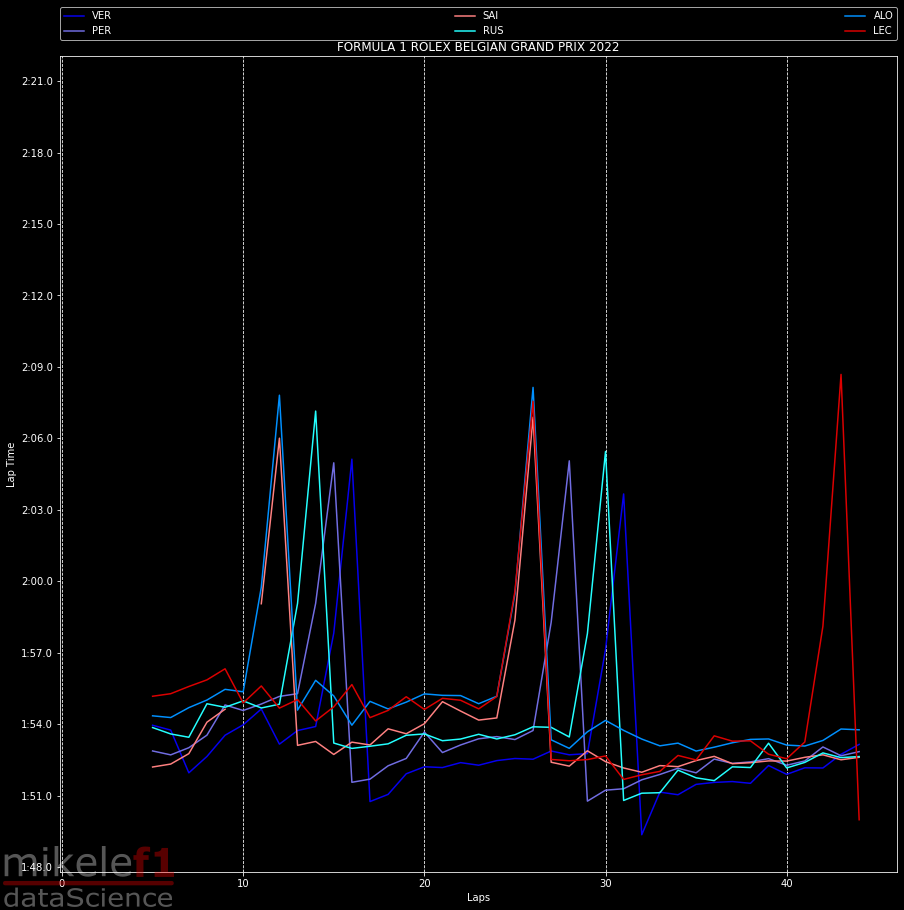

In [59]:
#with cbook.get_sample_data('../fastf1/images/logog.png') as file:
#    im = image.imread(file)

    
im = image.imread('../fastf1/images/logog.png')
    #Modo oscuro
plt.style.use('dark_background')

fig, ax = plt.subplots()

plt.rcParams['figure.figsize'] = [15, 15]

xx = list_laps[5]['LapNumber']
yy = list_laps[5]['LapTime']
c0 = pd.unique(list_laps[5]['Driver'])
c00 = ff1.plotting.driver_color(c0[0])
xx1 = list_laps[17]['LapNumber']
yy1 = list_laps[17]['LapTime']
c1 = pd.unique(list_laps[17]['Driver'])
c11 = ff1.plotting.driver_color(c1[0])
xx2 = list_laps[0]['LapNumber']
yy2 = list_laps[0]['LapTime']
c2 = pd.unique(list_laps[0]['Driver'])
c22 = ff1.plotting.driver_color(c2[0])
xx3 = list_laps[14]['LapNumber']
yy3 = list_laps[14]['LapTime']
c3 = pd.unique(list_laps[14]['Driver'])
c33 = ff1.plotting.driver_color(c3[0])
xx4 = list_laps[16]['LapNumber']
yy4 = list_laps[16]['LapTime']
c4 = pd.unique(list_laps[16]['Driver'])
c44 = ff1.plotting.driver_color(c4[0])
xx5 = list_laps[4]['LapNumber']
yy5 = list_laps[4]['LapTime']
c5 = pd.unique(list_laps[4]['Driver'])
c55 = ff1.plotting.driver_color(c5[0])

# Etiquetas Verticales | Pilotos
#ax.set_yticks(fastest_laps.index,labels=fastest_laps['Driver'])
ax.set(ylabel='Lap Time', xlabel='Laps')
ax.plot(xx,yy,color=c00, label=c0[0])
ax.plot(xx1,yy1,color=c11, label=c1[0])
ax.plot(xx2,yy2,color=c22, label=c2[0])
ax.plot(xx3,yy3,color=c33, label=c3[0])
ax.plot(xx4,yy4,color=c44, label=c4[0])
ax.plot(xx5,yy5,color=c55, label=c5[0])

#ax.invert_yaxis()
# Etiquetas
ax.set_title(session.event['OfficialEventName'])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right',
           ncol=3, mode="expand", borderaxespad=0.)
ax.set_ylabel('Lap Time')
ax.set_xlabel('Laps')
session.event

# Barras
# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='white', zorder=-1000)

fig.figimage(im, 3, 3, zorder=13, alpha=.35)


#Mostrar gráfico
#plt.savefig('2022-13-LFR-6Top.png')
nombrearchivo = str(year)+'-'+str(wknd)+'-LF'+ses+'-'+'6top.png'
plt.savefig(nombrearchivo)
plt.show()

In [60]:
print(ff1.plotting.driver_color('LEC'))

#dc0000


In [ ]:
print(c0[0])